In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]]

'Coat'

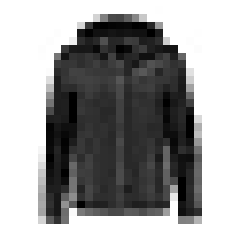

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

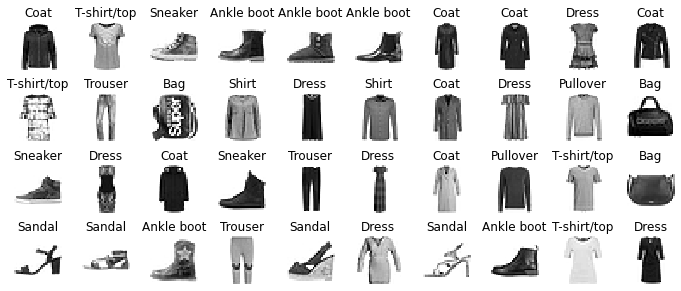

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


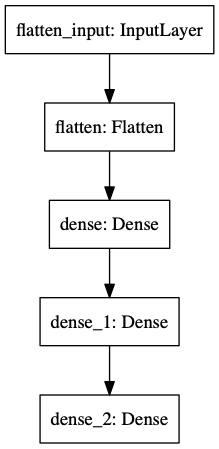

In [14]:
keras.utils.plot_model(model)

In [15]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00994771,  0.0003771 , -0.01291999, ...,  0.0631548 ,
         0.01012155,  0.05961226],
       [ 0.06276612,  0.02319212,  0.01432846, ..., -0.04106028,
        -0.04991773,  0.03644164],
       [ 0.0282229 , -0.01317885, -0.01259084, ...,  0.06681761,
         0.07089816, -0.03740184],
       ...,
       [-0.07222281, -0.05481634,  0.0688197 , ...,  0.03546014,
        -0.01332548,  0.01542886],
       [-0.01545655,  0.04908124, -0.06699992, ..., -0.05796514,
        -0.00357775,  0.00496216],
       [-0.04349132,  0.05244882,  0.02106833, ...,  0.0138025 ,
        -0.02568759,  0.06724165]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=["accuracy"])

In [24]:
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7198 - accuracy: 0.7603 - val_loss: 0.5417 - val_accuracy: 0.8086
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4896 - accuracy: 0.8298 - val_loss: 0.4350 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4420 - accuracy: 0.8448 - val_loss: 0.4125 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4155 - accuracy: 0.8542 - val_loss: 0.4114 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3945 - accuracy: 0.8615 - val_loss: 0.3915 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8672 - val_loss: 0.3817 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3652 - accuracy: 0.8709 - val_loss: 0.3787 - val_accuracy:

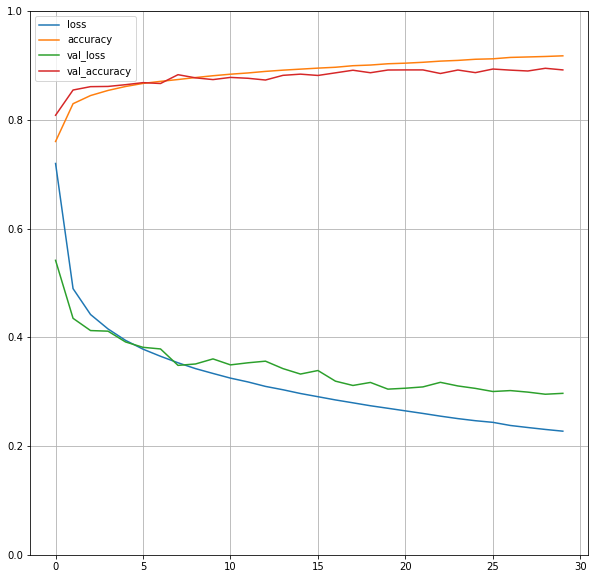

In [26]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 73.9926 - accuracy: 0.8330


[73.99261474609375, 0.8330000042915344]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
import numpy as np
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

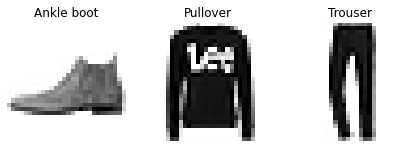

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 0s 951us/step - loss: 0.7210 - val_loss: 0.5239
Epoch 2/20
363/363 [==============================] - 0s 670us/step - loss: 0.4587 - val_loss: 0.5243
Epoch 3/20
363/363 [==============================] - 0s 916us/step - loss: 0.4206 - val_loss: 0.4202
Epoch 4/20
363/363 [==============================] - 0s 770us/step - loss: 0.4037 - val_loss: 0.4158
Epoch 5/20
363/363 [==============================] - 0s 689us/step - loss: 0.3974 - val_loss: 0.4055
Epoch 6/20
363/363 [==============================] - 0s 652us/step - loss: 0.3941 - val_loss: 0.4052
Epoch 7/20
363/363 [==============================] - 0s 659us/step - loss: 0.3859 - val_loss: 0.4113
Epoch 8/20
363/363 [==============================] - 0s 649us/step - loss: 0.3868 - val_loss: 0.3934
Epoch 9/20
363/363 [==============================] - 0s 677us/step - loss: 0.3795 - val_loss: 0.3943
Epoch 10/20
363/363 [==============================] - 0s 690us/step - loss: 0.377

In [43]:
mse_test

1.0662586688995361

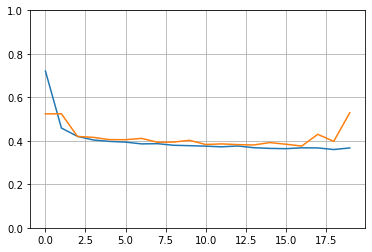

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 946us/step - loss: 2.1034 - val_loss: 1.0197
Epoch 2/20
363/363 [==============================] - 0s 776us/step - loss: 0.8089 - val_loss: 0.7240
Epoch 3/20
363/363 [==============================] - 0s 736us/step - loss: 0.6421 - val_loss: 0.6358
Epoch 4/20
363/363 [==============================] - 0s 778us/step - loss: 0.5809 - val_loss: 0.5871
Epoch 5/20
363/363 [==============================] - 0s 711us/step - loss: 0.5462 - val_loss: 0.5628
Epoch 6/20
363/363 [==============================] - 0s 707us/step - loss: 0.5231 - val_loss: 0.5296
Epoch 7/20
363/363 [==============================] - 0s 723us/step - loss: 0.5011 - val_loss: 0.5143
Epoch 8/20
363/363 [==============================] - 0s 722us/step - loss: 0.4861 - val_loss: 0.4948
Epoch 9/20
363/363 [==============================] - 0s 832us/step - loss: 0.4732 - val_loss: 0.4852
Epoch 10/20
363/363 [==============================] - 0s 854us/step - loss: 0.462

In [52]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [53]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [54]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.0793 - main_output_loss: 1.8081 - aux_output_loss: 4.5207 - val_loss: 1.2962 - val_main_output_loss: 1.0150 - val_aux_output_loss: 3.8276
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0728 - main_output_loss: 0.8491 - aux_output_loss: 3.0862 - val_loss: 0.9790 - val_main_output_loss: 0.7952 - val_aux_output_loss: 2.6333
Epoch 3/20
363/363 [==============================] - 0s 989us/step - loss: 0.8880 - main_output_loss: 0.7337 - aux_output_loss: 2.2766 - val_loss: 0.8489 - val_main_output_loss: 0.7172 - val_aux_output_loss: 2.0347
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7937 - main_output_loss: 0.6757 - aux_output_loss: 1.8563 - val_loss: 0.7752 - val_main_output_loss: 0.6693 - val_aux_output_loss: 1.7279
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7348 - main_output_loss: 0.6352 - aux_output_loss: 1.6307 - val_lo